# Lab 3 - Exploring Anscombe's Quartet

Francis Anscombe was an English statistician who loved graphs and wanted to demonstrate how numerical precision and numerical exploration aren't always as useful as a well-drawn graph.

In [1]:
%matplotlib inline

In [2]:
import pandas
import matplotlib.pyplot
import sklearn.linear_model
import time

In [3]:
df = pandas.read_csv('../../data/anscombe.csv', sep='\t')

In [4]:
df

,one_x,one_y,two_x,two_y,three_x,three_y,four_x,four_y
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


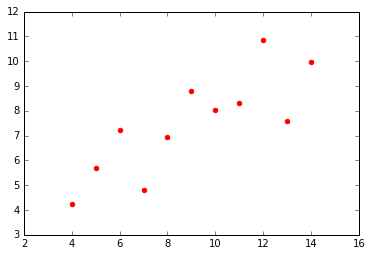

In [5]:
matplotlib.pyplot.scatter(df.one_x, df.one_y, color='red')

**Anscombe's First Dataset** is a fairly straight-forward linear relationship.

* Which regressors do you think will do a good job with this?

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


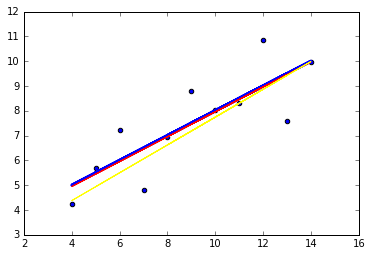

In [6]:
clf = sklearn.linear_model.LinearRegression()
clf.fit(df.loc[:,['one_x']], df.one_y)
theil = sklearn.linear_model.TheilSenRegressor()
theil.fit(df.loc[:,['one_x']], df.one_y)
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(df.loc[:,['one_x']], df.one_y)
matplotlib.pyplot.scatter(df.one_x, df.one_y)
matplotlib.pyplot.plot(df.one_x, clf.predict(df.one_x.reshape(-1,1)), color='blue', linewidth=3)
matplotlib.pyplot.plot(df.one_x, theil.predict(df.one_x.reshape(-1,1)), color='red', linewidth=1)
matplotlib.pyplot.plot(df.one_x, ransac.predict(df.one_x.reshape(-1,1)), color='yellow', linewidth=1)

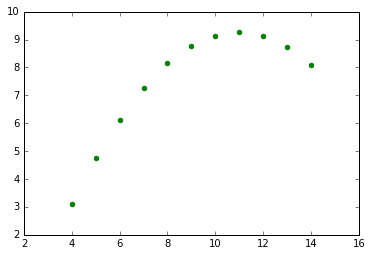

In [7]:
matplotlib.pyplot.scatter(df.two_x, df.two_y, color='green')

**Anscombe's Second Dataset** isn't linear at all.

* What would you expect from a linear regressor?
* (Hard) What could you regress against to expect a good result?

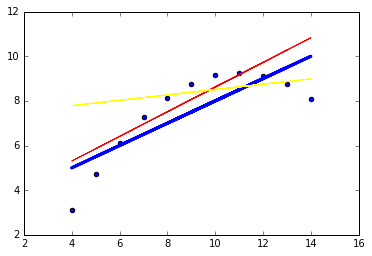

In [8]:
clf = sklearn.linear_model.LinearRegression()
clf.fit(df.loc[:,['two_x']], df.two_y)
theil = sklearn.linear_model.TheilSenRegressor()
theil.fit(df.loc[:,['two_x']], df.two_y)
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(df.loc[:,['two_x']], df.two_y)
matplotlib.pyplot.scatter(df.two_x, df.two_y)
matplotlib.pyplot.plot(df.two_x, clf.predict(df.two_x.reshape(-1,1)), color='blue', linewidth=3)
matplotlib.pyplot.plot(df.two_x, theil.predict(df.two_x.reshape(-1,1)), color='red', linewidth=1)
matplotlib.pyplot.plot(df.two_x, ransac.predict(df.two_x.reshape(-1,1)), color='yellow', linewidth=1)

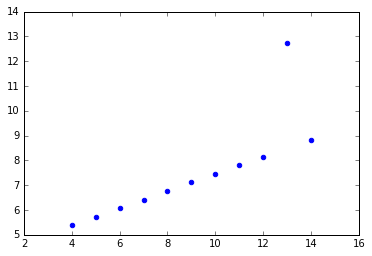

In [9]:
matplotlib.pyplot.scatter(df.three_x, df.three_y, color='blue')

**Anscombe's Third Dataset** has an outlier.

* Which regressors will cope with this?

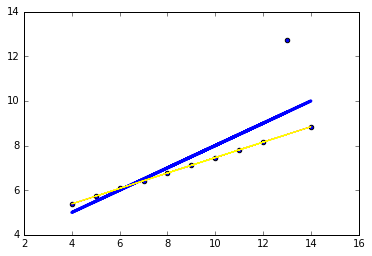

In [10]:
clf = sklearn.linear_model.LinearRegression()
clf.fit(df.loc[:,['three_x']], df.three_y)
theil = sklearn.linear_model.TheilSenRegressor()
theil.fit(df.loc[:,['three_x']], df.three_y)
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(df.loc[:,["three_x"]], df.three_y)
matplotlib.pyplot.scatter(df.three_x, df.three_y)
matplotlib.pyplot.plot(df.three_x, clf.predict(df.three_x.reshape(-1,1)), color='blue', linewidth=3)
matplotlib.pyplot.plot(df.three_x, theil.predict(df.three_x.reshape(-1,1)), color='red', linewidth=1)
matplotlib.pyplot.plot(df.three_x, ransac.predict(df.three_x.reshape(-1,1)), color='yellow', linewidth=1)

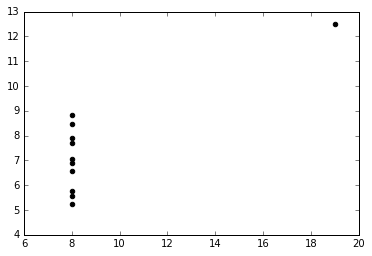

In [11]:
matplotlib.pyplot.scatter(df.four_x, df.four_y, color='black')

**Anscombe's Fourth Dataset** shows very little relationship at all between X and Y

* Which regressors will cope with this?
* What actually happens?

(Hint: infinite gradients are considered NaN and ignored)

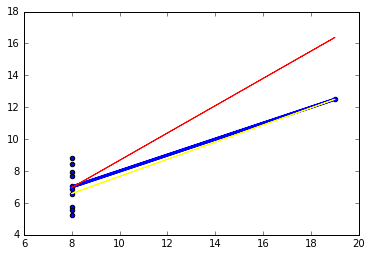

In [12]:
clf = sklearn.linear_model.LinearRegression()
clf.fit(df.loc[:,['four_x']], df.four_y)
theil = sklearn.linear_model.TheilSenRegressor()
theil.fit(df.loc[:,['four_x']], df.four_y)
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(df.loc[:,['four_x']], df.four_y)
matplotlib.pyplot.scatter(df.four_x, df.four_y)
matplotlib.pyplot.plot(df.four_x, clf.predict(df.four_x.reshape(-1,1)), color='blue', linewidth=3)
matplotlib.pyplot.plot(df.four_x, theil.predict(df.four_x.reshape(-1,1)), color='red', linewidth=1)
matplotlib.pyplot.plot(df.four_x, ransac.predict(df.four_x.reshape(-1,1)), color='yellow', linewidth=1)